In [1]:
import pandas as pd

In [2]:
df_2=pd.read_excel("/Users/janehrlinspiel/Library/CloudStorage/OneDrive-Persönlich/Crypto/Daten/crypto_7years_daily.xlsx",sheet_name="Cleaned data", parse_dates=["DATES"])

Total return: 957.27%
Annualized return: 27.31%
Sharpe Ratio: 0.84


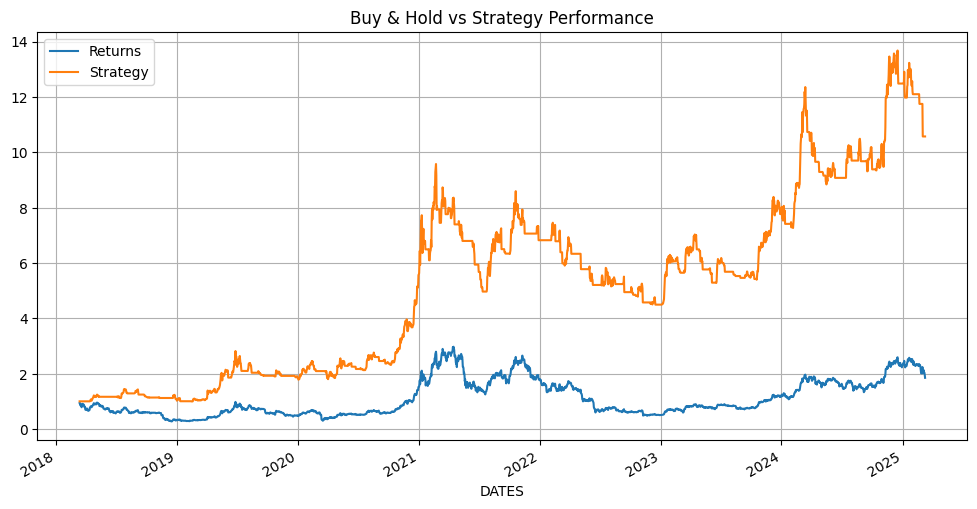

In [3]:
from backtester import Backtester
from strategies.trend_following import TrendFollowingStrategy
from strategies.mean_reversion import MeanReversionStrategy

if __name__ == "__main__":
    asset_name="Bitcoin"
    strategy = TrendFollowingStrategy(window=20,asset_name=asset_name)
    #strategy = MeanReversionStrategy(window=20,threshold=0.1, asset_name="Bitcoin")

    bt = Backtester(
        data_path="data/crypto_7years_daily.csv",
        strategy=strategy,
        initial_cash=10000,
        asset_name=asset_name
    )

    bt.run()
    bt.evaluate()
    bt.plot()


In [ ]:
import pandas as pd
from backtester import Backtester
from strategies.trend_following import TrendFollowingStrategy
from strategies.mean_reversion import MeanReversionStrategy

# --- CONFIG ---
EXCEL_PATH = "/Users/janehrlinspiel/.../crypto_7years_daily.xlsx"
strategy_class = TrendFollowingStrategy  # <- change to desired strategy
param_grid = {
    "window": [10, 20, 50],
    # add more parameters here if needed
}
initial_cash = 10000

# Load all sheet names (one per asset)
xls = pd.ExcelFile(EXCEL_PATH)
sheet_names = xls.sheet_names

# --- HELPERS ---
from itertools import product

def get_param_combinations(grid):
    keys = list(grid.keys())
    values = list(grid.values())
    for combo in product(*values):
        yield dict(zip(keys, combo))

# --- RUN ---
results = []

for asset in sheet_names:
    df = xls.parse(asset)
    df = df[["Date", "Close"]].dropna()
    df["Date"] = pd.to_datetime(df["Date"])
    df.set_index("Date", inplace=True)

    for params in get_param_combinations(param_grid):
        # Instantiate strategy with dynamic parameters
        strategy = strategy_class(**params)

        bt = Backtester(
            data=df.copy(),  # changed from file path to raw data
            strategy=strategy,
            initial_cash=initial_cash
        )
        bt.run()
        bt.evaluate(silent=True)  # silent=True to suppress printing

        result = {
            "asset": asset,
            **params,
            **bt.get_performance_metrics()  # e.g., return, sharpe
        }

        results.append(result)

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)
